# Project 

This is the project for course EE4540 Distributed Signal Processing.

Environment:

Python = 3.12

In [1]:
import numpy as np
from scipy.spatial import distance_matrix
import networkx as nx
import matplotlib.pyplot as plt
# import matplotlib.animation as animation
# from matplotlib.colors import LinearSegmentedColormap
# import seaborn as sns
import time
import random
from math import log, pi, ceil
from scipy.optimize import fsolve

## Q1
复制过来

In [5]:
# 设置随机种子
np.random.seed(42)
random.seed(42)


In [163]:
selection = input(" Do you like the communication radius fixed(option 1) or the number of sensors fixed(option 2)?")
if selection != "1" and selection != "2":
    print("Holy shit!")
else:
    print("")
    selection_2 = input("Do you want to check certain number of your choice(option 1) or you want to see a tendency(option 2)?")
    if selection_2 != "1" and selection_2 != "2":
        print("Holy shit again!")

if selection == "1":
    if selection_2 == "1":
        selection_final = 1
    else:
        selection_final = 2
elif selection_2 == "1":
    selection_final = 3
else:
    selection_final = 4
print(selection_final)


3


In [164]:
# Definition of the sizes
Area_Length = 100              # The length of the area, both length and width are the same
Area_Size = Area_Length ** 2
Area_Coverage = 0.999          # Define the total coverage of the sensors
Connected_Prob = 0.99


# Known r, calculate n
def nodes_for_coverage(area_size, Comm_Radius, coverage_required):
    return ceil(-area_size * np.log(1 - coverage_required) / (pi * Comm_Radius ** 2))


# Minimum amount of sensors according to RGG
def nodes_for_connectivity(normalized_radius, dimension, probability):
    def equation(n_array):
        '''This is the equation for RGG'''
        return (2 * np.log(n_array[0])) / n_array[0] - normalized_radius ** dimension

    n_array = [10.0]
    n_connectivity = fsolve(equation, n_array)  # Calculation the equation equals to 0, n_array is a start point
    # Consider the probability of connection
    n_prob = ceil(np.sqrt(1 / (1 - probability)))

    return max(int(ceil(n_connectivity[0])), n_prob)

def nodes_final (Comm_Radius):
    # Calculate number of nodes
    n_coverage = nodes_for_coverage(Area_Size, Comm_Radius, Area_Coverage)
    print(f"Minimum sensors required for coverage: {n_coverage}")
    n_connectivity = nodes_for_connectivity(Comm_Radius / Area_Length, dimension=2, probability=Connected_Prob)
    print(f"Minimum sensors required for connectivity: {n_connectivity}")

    n_final = max(n_connectivity, n_coverage)
    print(f"Final number of sensors used: {n_final}")
    # Random place the sensors
    # np.random.seed(42)
    sensor_location = np.random.uniform(0, Area_Length, (n_final, 2))

    # Calculate Euclidean distance matrix
    Euc_matrix = distance_matrix(sensor_location, sensor_location)

    # Calculate adjacency matrix
    adj_matrix = (Euc_matrix <= Comm_Radius) & (Euc_matrix > 0)

    # Build network graph
    Graphs = nx.Graph()
    for i in range(n_final):
        Graphs.add_node(i, pos=tuple(sensor_location[i]))

    for j in range(n_final):
        for k in range(j + 1, n_final):
            if adj_matrix[j, k]:
                Graphs.add_edge(j, k)
    return(Graphs, n_final, sensor_location)

Minimum radius required for coverage: 141.4213562373095
Minimum radius of sensors required for connectivity: 141.4213562373095
Final radius of sensors used: 141.4213562373095
The graph is connected
Minimum radius required for coverage: 20.76387698808038
Minimum radius of sensors required for connectivity: 39.266937810197675
Final radius of sensors used: 39.266937810197675
The graph is connected
Minimum radius required for coverage: 14.754783740587769
Minimum radius of sensors required for connectivity: 30.230535073988605
Final radius of sensors used: 30.230535073988605
The graph is connected
Minimum radius required for coverage: 12.067159738241251
Minimum radius of sensors required for connectivity: 25.778680643839706
Final radius of sensors used: 25.778680643839706
The graph is connected
Minimum radius required for coverage: 10.459128690626134
Minimum radius of sensors required for connectivity: 22.971548285926318
Final radius of sensors used: 22.971548285926318
The graph is connected

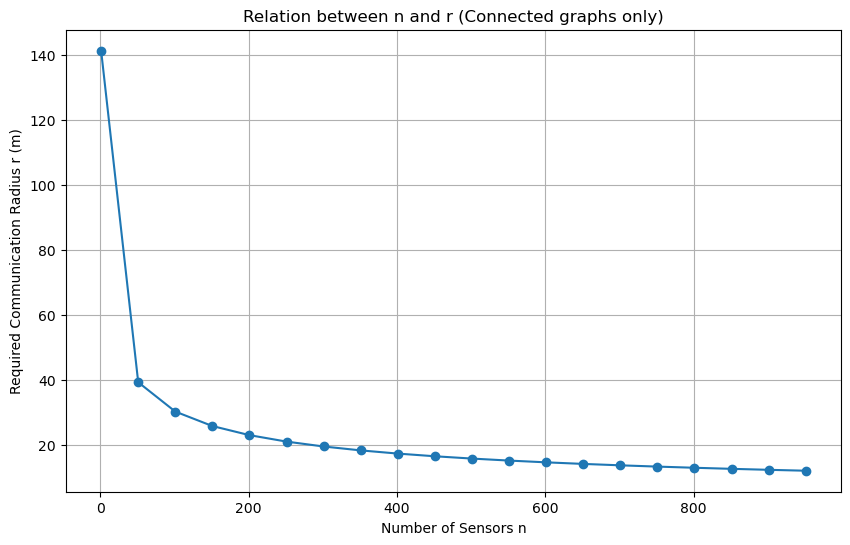

In [165]:
if selection_final == 1:
    # Circle for different r
    r_values = []
    n_values = []
    connected_count = 0
    disconnected_count = 0
    for Comm_Radius in range(5, 100, 1):

        Graphs, n_final,_ = nodes_final(Comm_Radius)
        # Check connectivity
        connection_state = nx.is_connected(Graphs)
        if connection_state:
            print("The graph is connected")
            connected_count += 1
            r_values.append(Comm_Radius)
            n_values.append(n_final)
        else:
            print("The graph is not connected")

    print(f"Connected graphs: {connected_count}")
    print(f"Disconnected graphs: {disconnected_count}")

    # Plot r vs n
    plt.figure(figsize=(10, 6))
    plt.plot(r_values, n_values, marker='o')
    plt.xlabel("Communication Radius r (m)")
    plt.ylabel("Required Number of Sensors n")
    plt.yscale('log')
    plt.title("Relation between r and n (Connected graphs only)")
    plt.grid(True)
    plt.show()
if selection_final == 2:
    Comm_Radius = input("Please input the communication Radius r (m):")
    Graphs, n_final, sensor_location = nodes_final(int(Comm_Radius))
    connection_state = nx.is_connected(Graphs)
    if connection_state:
        print("The graph is connected")
    else:
        print("The graph is not connected")
    # Visualize the graph
    pos_dict = {i: sensor_location[i] for i in range(n_final)}
    plt.figure(figsize=(8, 8))
    nx.draw(Graphs, pos=pos_dict, node_size=50, with_labels=False,
            node_color='skyblue', edge_color='gray')
    plt.title(f"Random Geometric Graph (Connected: {connection_state})")
    plt.grid(True)
    plt.xlim(0, Area_Length)
    plt.ylim(0, Area_Length)
    plt.show()


# Known n, calculate r

def radius_for_coverage(number_nodes):
    r_cov = np.sqrt(-Area_Size * log(1 - Area_Coverage) / (pi * number_nodes))
    maximum_radius = Area_Length * np.sqrt(2)
    if r_cov > maximum_radius:
        return maximum_radius
    else:
        return r_cov

def radius_for_connectivity(number_nodes):
    if (1 - 1/(number_nodes **2)) < Connected_Prob:
        maximum_radius = Area_Length * np.sqrt(2)
        return maximum_radius
    else:
        r_conn = Area_Length * np.sqrt(2 * log(number_nodes)/number_nodes)
        return r_conn

def radius_final(number_nodes):
    r_coverage = radius_for_coverage(number_nodes)
    print(f"Minimum radius required for coverage: {r_coverage}")
    r_connectivity = radius_for_connectivity(number_nodes)
    print(f"Minimum radius of sensors required for connectivity: {r_connectivity}")

    r_final = max(r_connectivity, r_coverage)
    print(f"Final radius of sensors used: {r_final}")
    # Random place the sensors
    # np.random.seed(42)
    sensor_location = np.random.uniform(0, Area_Length, (number_nodes, 2))

    # Calculate Euclidean distance matrix
    Euc_matrix = distance_matrix(sensor_location, sensor_location)

    # Calculate adjacency matrix
    adj_matrix = (Euc_matrix <= r_final) & (Euc_matrix > 0)

    # Build network graph
    Graphs = nx.Graph()
    for i in range(number_nodes):
        Graphs.add_node(i, pos=tuple(sensor_location[i]))

    for j in range(number_nodes):
        for k in range(j + 1, number_nodes):
            if adj_matrix[j, k]:
                Graphs.add_edge(j, k)
    return(Graphs, r_final, sensor_location)


if selection_final == 3:
    # Circle for different n
    r_values = []
    n_values = []
    connected_count = 0
    disconnected_count = 0
    for number_nodes in range(1, 1000, 50):

        Graphs, r_final,_ = radius_final(number_nodes)
        # Check connectivity
        connection_state = nx.is_connected(Graphs)
        if connection_state:
            print("The graph is connected")
            connected_count += 1
            r_values.append(r_final)
            n_values.append(number_nodes)
        else:
            print("The graph is not connected")

    print(f"Connected graphs: {connected_count}")
    print(f"Disconnected graphs: {disconnected_count}")

    # Plot r vs n
    plt.figure(figsize=(10, 6))
    plt.plot(n_values, r_values, marker='o')
    plt.xlabel("Number of Sensors n")
    plt.ylabel("Required Communication Radius r (m)")
    #plt.yscale('log')
    plt.title("Relation between n and r (Connected graphs only)")
    plt.grid(True)
    plt.show()

if selection_final == 4:
    number_nodes = input("Please input the number of sensors:")
    Graphs, r_final, sensor_location = radius_final(int(number_nodes))
    connection_state = nx.is_connected(Graphs)
    if connection_state:
        print("The graph is connected")
    else:
        print("The graph is not connected")
    # Visualize the graph
    pos_dict = {i: sensor_location[i] for i in range(int(number_nodes))}
    plt.figure(figsize=(8, 8))
    nx.draw(Graphs, pos=pos_dict, node_size=50, with_labels=False,
            node_color='skyblue', edge_color='gray')
    plt.title(f"Random Geometric Graph (Connected: {connection_state})")
    plt.grid(True)
    plt.xlim(0, Area_Length)
    plt.ylim(0, Area_Length)
    plt.show()

## Generate nodes and edges for further processing
随机生成结点和相应联通边

n=120 r=30

In [2]:
# Definition of the sizes
Area_Length = 100              # The length of the area, both length and width are the same
Area_Size = Area_Length ** 2
Area_Coverage = 0.999          # Define the total coverage of the sensors
Connected_Prob = 0.99

In [3]:
n = 50                   # Number of sensors
Comm_Radius = 40          # Communication radius of each sensor

sensor_location = np.random.uniform(0, Area_Length, (n, 2))

# Calculate Euclidean distance matrix
Euc_matrix = distance_matrix(sensor_location, sensor_location)

# Calculate adjacency matrix
adj_matrix = (Euc_matrix <= Comm_Radius) & (Euc_matrix > 0)
print(adj_matrix)

# Build network graph
Graphs = nx.Graph()
for i in range(n):
    Graphs.add_node(i, pos = tuple(sensor_location[i]))

for j in range(n):
    for k in range (j+1, n):
        if adj_matrix[j,k]:
            Graphs.add_edge(j, k)
print(f"Network connected: {nx.is_connected(Graphs)}")
print(f"Number of edges: {Graphs.number_of_edges()}")

[[False False False ... False False False]
 [False False False ... False  True  True]
 [False False False ...  True False False]
 ...
 [False False  True ... False False False]
 [False  True False ... False False  True]
 [False  True False ... False  True False]]
Network connected: True
Number of edges: 441


In [4]:
# 初始值
init_values = np.random.uniform(20, 30, n)
global_avg = np.mean(init_values)
print(f"Global average: {global_avg:.4f}")


Global average: 25.4242


## Q2 Averaging
### randomised gossip

In [15]:
# 随机Gossip算法实现
def randomised_gossip(init_values, adj_matrix, global_avg, max_iterations=5000, convergence_threshold=1e-6):
    """实现随机Gossip算法计算平均值"""
    # 全局平均值仅用于验证，实际分布式算法中不用

    values = init_values.copy()
    n = len(values)
    
    # 初始化历史记录
    history = {
        # 'node_values': [],
        # 'avg_estimates': [],
        'errors': [],
        'transmissions': 0,
        'iteration': 0
    }
    
    # 初始状态
    # history['node_values'].append(np.array([graph.nodes[i]['value'] for i in graph.nodes]))
    # history['avg_estimates'].append(np.mean(np.array([graph.nodes[i]['avg_value'] for i in graph.nodes])))
    history['errors'].append(np.sum((values - global_avg) ** 2))
    
    iteration = 0
    
    while iteration < max_iterations:
        # 随机选择一个节点
        node_i = random.randint(0, n - 1)
        
        # 随机选择一个邻居
        neighbors = [idx for idx, connected in enumerate(adj_matrix[node_i]) if connected]
        if not neighbors:
            continue
        node_j = random.choice(neighbors)
        
        # 交换值并更新
        value_i = values[node_i]
        value_j = values[node_j]
        
        # 计算平均值
        new_value = (value_i + value_j) / 2.0
        
        # 更新两个节点的值
        values[node_i] = new_value
        values[node_j] = new_value
        
        # 记录传输次数
        history['transmissions'] += 2  # 双向通信

        iteration += 1
        
        # 记录当前状态
        if iteration % 10 == 0:  # 每10次迭代记录一次
            # current_values = np.array([graph.nodes[i]['avg_value'] for i in graph.nodes])
            # history['node_values'].append(current_values.copy())
            # history['avg_estimates'].append(np.mean(current_values))
            current_error = np.sum((values - global_avg) ** 2)
            history['errors'].append(current_error)
            
            # 检查收敛
            if current_error < convergence_threshold:
                break
    
    history['iteration'] = iteration

    return values, history



In [16]:
# 运行随机Gossip算法
print("\nRunning randomised gossip algorithm...")
start_time = time.time()
final_rg, history_rg = randomised_gossip(init_values, adj_matrix, global_avg, max_iterations=3000)
elapsed_time = time.time() - start_time

# 输出结果
final_values = final_rg
final_avg = np.mean(final_values)
final_error = history_rg['errors'][-1]  # 最后一次记录的误差

print("\nAlgorithm completed!")
print(f"Total iterations: {len(history_rg['errors'])*10}")
print(f"Total transmissions: {history_rg['transmissions']}")
print(f"Execution time: {elapsed_time:.4f} seconds")
print(f"Final estimated average: {final_avg:.8f}")
print(f"Global average: {global_avg:.8f}")
print(f"Absolute error: {abs(final_avg - global_avg):.8f}")
print(f"Square error: {final_error:.8f}")
# print(f"Converged: {'Yes' if converged else 'No'}")



Running randomised gossip algorithm...

Algorithm completed!
Total iterations: 2000
Total transmissions: 3980
Execution time: 0.0120 seconds
Final estimated average: 25.42424650
Global average: 25.42424650
Absolute error: 0.00000000
Square error: 0.00000099


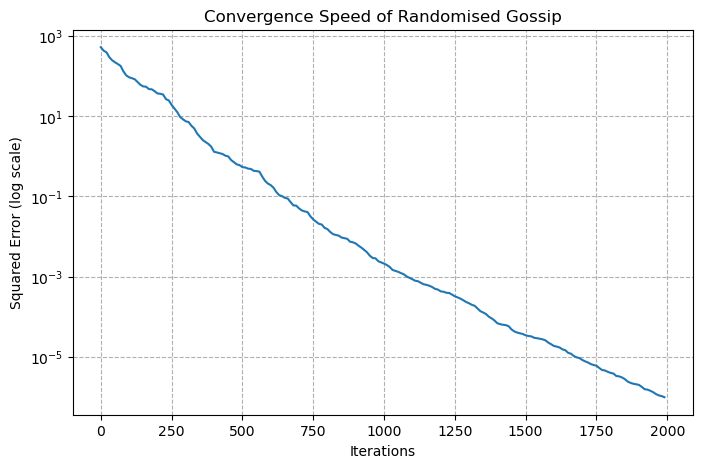

In [18]:
# convergence speed
# 绘制收敛速度图
plt.figure(figsize=(8, 5))
plt.semilogy(np.arange(0, len(history_rg['errors'])) * 10, history_rg['errors'])
plt.xlabel('Iterations')
plt.ylabel('Squared Error (log scale)')
plt.title('Convergence Speed of Randomised Gossip')
plt.grid(True, which="both", ls="--")
plt.show()

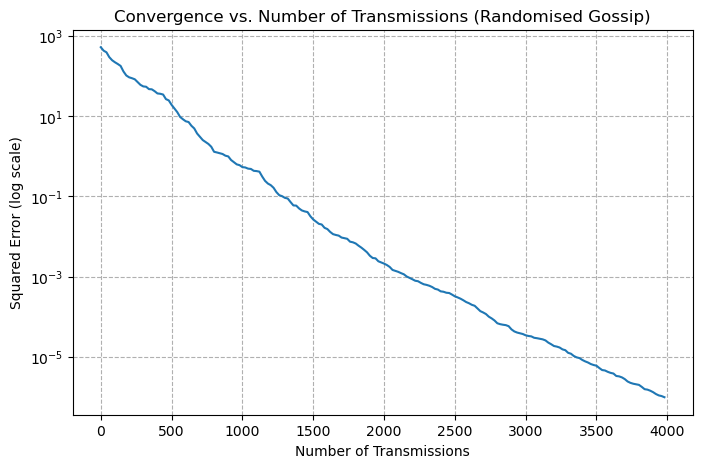

In [19]:
# number of transmissions
plt.figure(figsize=(8, 5))
plt.semilogy(np.arange(0, len(history_rg['errors'])) * 10 * 2, history_rg['errors'])
plt.xlabel('Number of Transmissions')
plt.ylabel('Squared Error (log scale)')
plt.title('Convergence vs. Number of Transmissions (Randomised Gossip)')
plt.grid(True, which="both", ls="--")
plt.show()

### PDMM

In [8]:
def pdmm_average_consensus(
        v,               # Local sensor readings a_i
        adj,             # Adjacency matrix (bool 2-D)
        c=1.0,           # PDMM tuning parameter c ≈ 1/ρ c不是大于0就行了吗
        is_unicast=True,  # 是否单向通信
        is_synchronous=True,  # 是否同步
        active_rate=1.0,  # 每次迭代中活跃节点的比例
        max_iter=5000,
        tol=1e-6,
        log_freq=10,
        verbose=False):
    """
    Synchronous PDMM for the average-consensus problem.

    Returns
    -------
    x : np.ndarray
        Consensus values at each node.
    history : dict
        'errors'          squared-error trace ‖x-avg‖² every log_freq iters
        'tx_curve'        cumulative number of scalar transmissions
        'transmissions'   final total transmissions
    """
    n       = len(v)
    deg     = np.sum(adj, axis=1)            # Node degree d_i
    avg     = v.mean()

    # ---------- Initialisation ----------
    # Directed edge set: (i, j) s.t. i ≠ j and adj[i, j] == True
    dir_edges = [(i, j) for i in range(n) for j in range(n)
                 if i != j and adj[i, j]]
    z   = {e: 0.0 for e in dir_edges}        # z_{i|j}
    x   = v.copy()

    # ---------- Logging ----------
    err_hist = [np.sum((x - avg) ** 2)]
    tx_hist  = [0]
    transmissions = 0
    # iterations = 0 # 这是个问题

    # ---------- Main loop ----------
    for k in range(1, max_iter + 1):
        # according to is_synchronous, iterate over all nodes or just some random ones
        if is_synchronous:
            active_nodes = range(n)
        else:
            active_nodes = random.sample(range(n), int(active_rate * n))

        # 1) x-update
        y = {}
        for i in active_nodes:
            edges = [(i, j) for j in range(n) if adj[i, j] and i != j]
            if not edges:
                continue

            s_z = sum(z[edge] for edge in edges)
            x[i] = (v[i] - s_z) / (1 + c * deg[i])

            # 2) y-updates
            for edge in edges:
                y[edge] = z[edge] + 2 * c * x[i]    # y_{i|j}^{(k)}

            if is_unicast:
                # Unicast: send y_{i|j} to j
                transmissions += len(edges)
            else:
                # Broadcast: send x_{k} to j
                transmissions += 1

        # 3) z-updates
        for i in active_nodes:
            for j in range(n):
                if i != j and adj[i, j]:
                    z[(j, i)] = -y[(i, j)]          # z_{i|j}^{(k+1)}

        # Logging / convergence check
        if k % log_freq == 0:
            err = np.sum((x - avg) ** 2)
            err_hist.append(err)
            tx_hist.append(transmissions)
            if verbose:
                print(f"iter {k:5d} | err = {err:.3e}")
            if err < tol:
                break

    history = {
        'errors': err_hist,
        'tx_curve': tx_hist,
        'transmissions': tx_hist[-1],
        'iteration': k
    }
    
    return x, history

In [ ]:
# ------------------ Run PDMM algorithm ------------------ 这段其实可以删,之前应该是用来测试用的
final_pdmm, history_pdmm = pdmm_average_consensus(init_values, adj_matrix)
print("Errors:", history_pdmm['errors'])
print("Length:", len(history_pdmm['errors']))

Errors: [np.float64(522.5850718320993), np.float64(3756.7701618603814), np.float64(377.8533906393339), np.float64(38.1391716325356), np.float64(3.959261596365315), np.float64(0.44278765560374617), np.float64(0.055759409977551785), np.float64(0.007843696337850172), np.float64(0.0013234759263719015), np.float64(0.00021498986392682335), np.float64(7.380778145946237e-05), np.float64(2.4123869558032553e-05), np.float64(6.755998679838267e-06), np.float64(1.655110969275355e-06), np.float64(6.173498531942415e-07)]
Length: 15


In [ ]:
# ------ Run PDMM with timing ------
start_time = time.time()
final_pdmm, history_pdmm = pdmm_average_consensus(init_values, adj_matrix)
elapsed_time = time.time() - start_time

# ------ Postprocessing metrics ------
final_values = final_pdmm
final_avg = np.mean(final_values)
global_avg = np.mean(init_values)
final_error = history_pdmm['errors'][-1]         # last squared error

# ------ Output results ------
print("\nAlgorithm completed!")
print(f"Total iterations: {len(history_pdmm['errors']) * 10}")
print(f"Total transmissions: {history_pdmm['transmissions']}")
print(f"Execution time: {elapsed_time:.4f} seconds")
print(f"Final estimated average: {final_avg:.8f}")
print(f"Global average: {global_avg:.8f}")
print(f"Absolute error: {abs(final_avg - global_avg):.8f}")
print(f"Square error: {final_error:.8f}") # 没有mean


Algorithm completed!
Total iterations: 150
Total transmissions: 123480
Execution time: 0.1696 seconds
Final estimated average: 25.42424398
Global average: 25.42424650
Absolute error: 0.00000252
Mean square error: 0.00000062


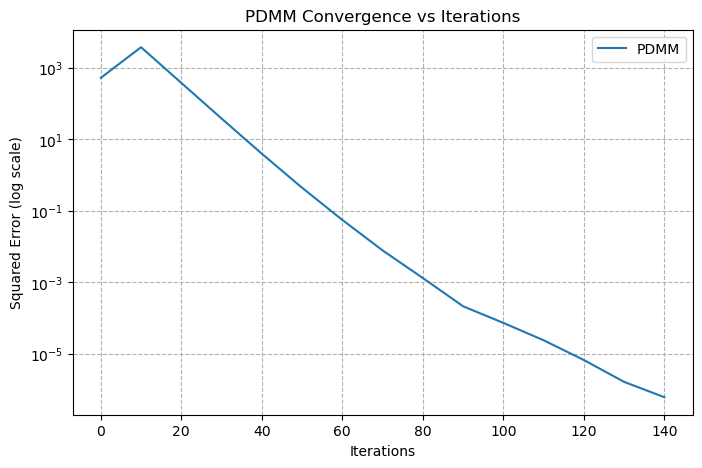

In [12]:
# ------------------ Visualization: error vs iteration ------------------
plt.figure(figsize=(8, 5))
plt.semilogy(np.arange(0, len(history_pdmm['errors'])) * 10, history_pdmm['errors'], label='PDMM')
plt.xlabel('Iterations')
plt.ylabel('Squared Error (log scale)')
plt.title('PDMM Convergence vs Iterations')
plt.grid(True, which='both', linestyle='--')
plt.legend()
plt.show()

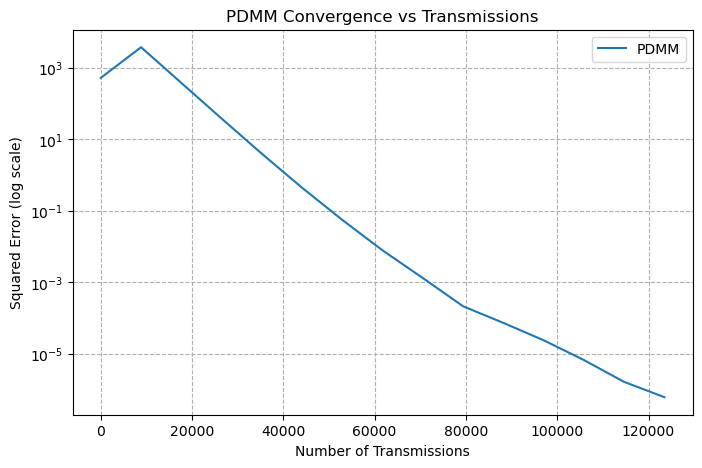

In [22]:
# ------------------ Visualization: error vs number of transmissions ------------------
plt.figure(figsize=(8, 5))
plt.semilogy(history_pdmm['tx_curve'], history_pdmm['errors'], label='PDMM')
plt.xlabel('Number of Transmissions')
plt.ylabel('Squared Error (log scale)')
plt.title('PDMM Convergence vs Transmissions')
plt.grid(True, which='both', linestyle='--')
plt.legend()
plt.show()

In [14]:
# ------------------ Output total number of transmissions ------------------
print("Total number of transmissions used by PDMM:", history_pdmm['transmissions'])

Total number of transmissions used by PDMM: 123480


### Comparison between RG and PDMM

In [28]:
# run 4 results of syn unicast pdmm, asyn unicast pdmm, syn broadcast pdmm, asyn broadcast pdmm
pdmm_syn_unicast, history_pdmm_syn_unicast = pdmm_average_consensus(init_values, adj_matrix)
pdmm_asyn_unicast, history_pdmm_asyn_unicast = pdmm_average_consensus(
    init_values, adj_matrix, is_synchronous=False, active_rate=0.5)
pdmm_syn_broadcast, history_pdmm_syn_broadcast = pdmm_average_consensus(
    init_values, adj_matrix, is_unicast=False)
pdmm_asyn_broadcast, history_pdmm_asyn_broadcast = pdmm_average_consensus(
    init_values, adj_matrix, is_unicast=False, is_synchronous=False, active_rate=0.5)

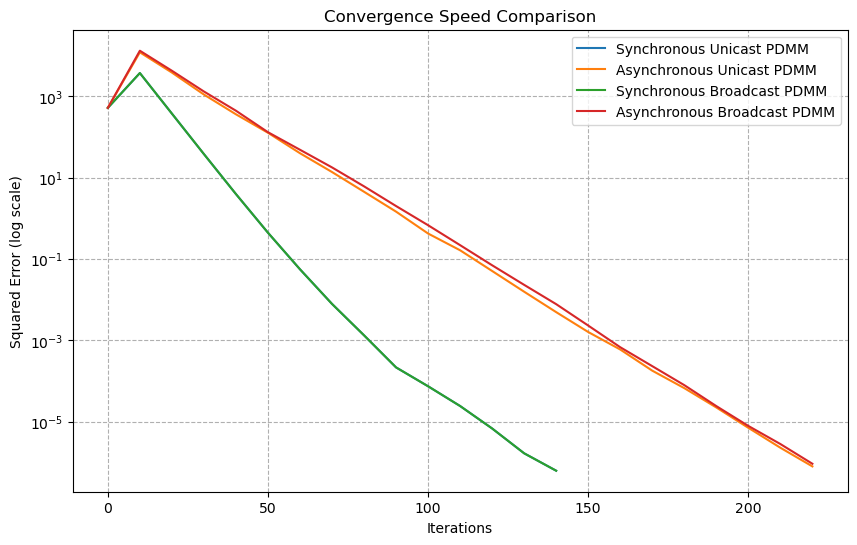

In [29]:
# generate image showing the squared error vs iteration
# the image has 5 lines, representing the results of syn unicast pdmm, asyn unicast pdmm, syn broadcast pdmm, asyn broadcast pdmm
plt.figure(figsize=(10, 6))

# Synchronous Unicast PDMM
plt.semilogy(np.arange(0, len(history_pdmm_syn_unicast['errors'])) * 10,
                history_pdmm_syn_unicast['errors'], label='Synchronous Unicast PDMM')

# Asynchronous Unicast PDMM
plt.semilogy(np.arange(0, len(history_pdmm_asyn_unicast['errors'])) * 10,
                history_pdmm_asyn_unicast['errors'], label='Asynchronous Unicast PDMM')

# Synchronous Broadcast PDMM
plt.semilogy(np.arange(0, len(history_pdmm_syn_broadcast['errors'])) * 10,
                history_pdmm_syn_broadcast['errors'], label='Synchronous Broadcast PDMM')

# Asynchronous Broadcast PDMM
plt.semilogy(np.arange(0, len(history_pdmm_asyn_broadcast['errors'])) * 10,
                history_pdmm_asyn_broadcast['errors'], label='Asynchronous Broadcast PDMM')

plt.xlabel('Iterations')
plt.ylabel('Squared Error (log scale)')
plt.title('Convergence Speed Comparison')
plt.grid(True, which="both", ls="--")
plt.legend()
# plt.savefig('error_vs_iteration_comparison.png') # Save the figure
plt.show()

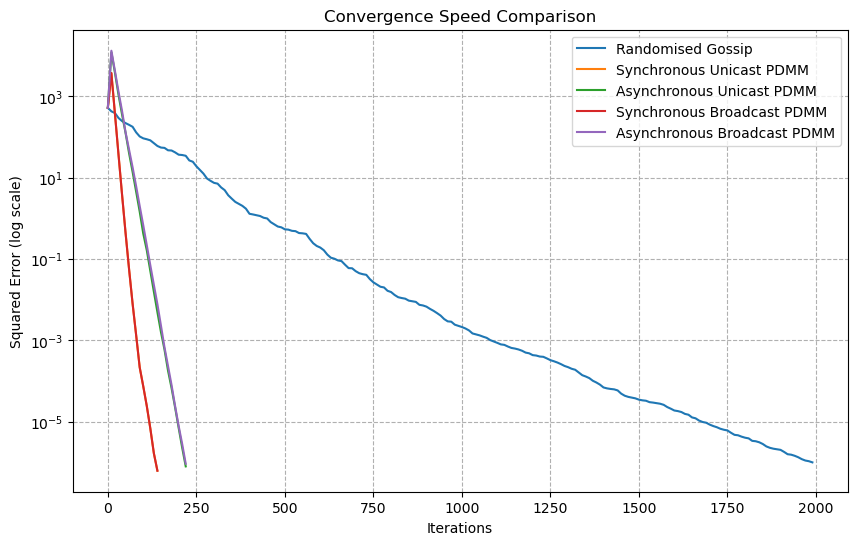

In [30]:
# generate image showing the squared error vs iteration
# the image has 5 lines, representing the results of rg, syn unicast pdmm, asyn unicast pdmm, syn broadcast pdmm, asyn broadcast pdmm
plt.figure(figsize=(10, 6))

# Randomised Gossip
plt.semilogy(np.arange(0, len(history_rg['errors'])) * 10, history_rg['errors'], label='Randomised Gossip')

# Synchronous Unicast PDMM
plt.semilogy(np.arange(0, len(history_pdmm_syn_unicast['errors'])) * 10,
                history_pdmm_syn_unicast['errors'], label='Synchronous Unicast PDMM')

# Asynchronous Unicast PDMM
plt.semilogy(np.arange(0, len(history_pdmm_asyn_unicast['errors'])) * 10,
                history_pdmm_asyn_unicast['errors'], label='Asynchronous Unicast PDMM')

# Synchronous Broadcast PDMM
plt.semilogy(np.arange(0, len(history_pdmm_syn_broadcast['errors'])) * 10,
                history_pdmm_syn_broadcast['errors'], label='Synchronous Broadcast PDMM')

# Asynchronous Broadcast PDMM
plt.semilogy(np.arange(0, len(history_pdmm_asyn_broadcast['errors'])) * 10,
                history_pdmm_asyn_broadcast['errors'], label='Asynchronous Broadcast PDMM')

plt.xlabel('Iterations')
plt.ylabel('Squared Error (log scale)')
plt.title('Convergence Speed Comparison')
plt.grid(True, which="both", ls="--")
plt.legend()
# plt.savefig('error_vs_iteration_comparison.png') # Save the figure
plt.show()

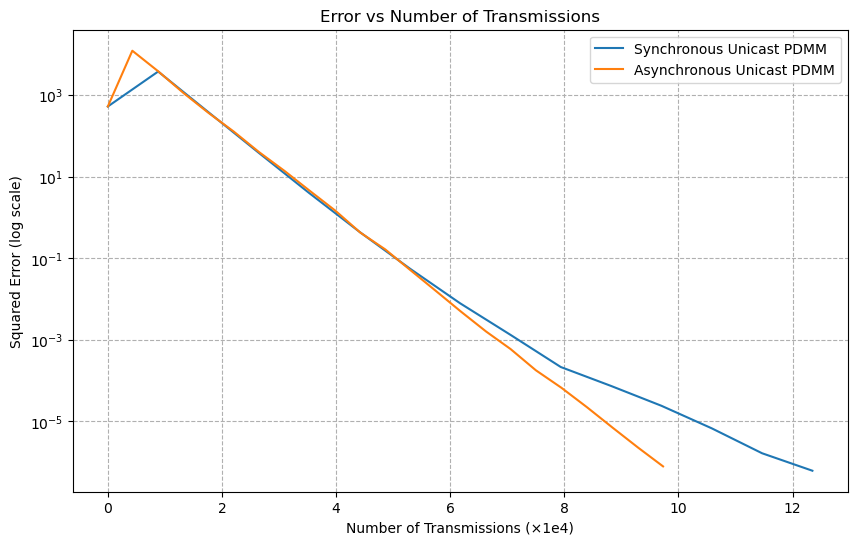

In [31]:
# generate image showing the squared error vs number of transmissions
# only the results of syn unicast pdmm, asyn unicast pdmm
plt.figure(figsize=(10, 6))
# Synchronous Unicast PDMM
plt.semilogy(np.array(history_pdmm_syn_unicast['tx_curve']) / 1e4, history_pdmm_syn_unicast['errors'], label='Synchronous Unicast PDMM')
# Asynchronous Unicast PDMM
plt.semilogy(np.array(history_pdmm_asyn_unicast['tx_curve']) / 1e4, history_pdmm_asyn_unicast['errors'], label='Asynchronous Unicast PDMM')

plt.xlabel('Number of Transmissions (×1e4)')
plt.ylabel('Squared Error (log scale)')
plt.title('Error vs Number of Transmissions')
plt.grid(True, which="both", ls="--")
plt.legend()
plt.show()

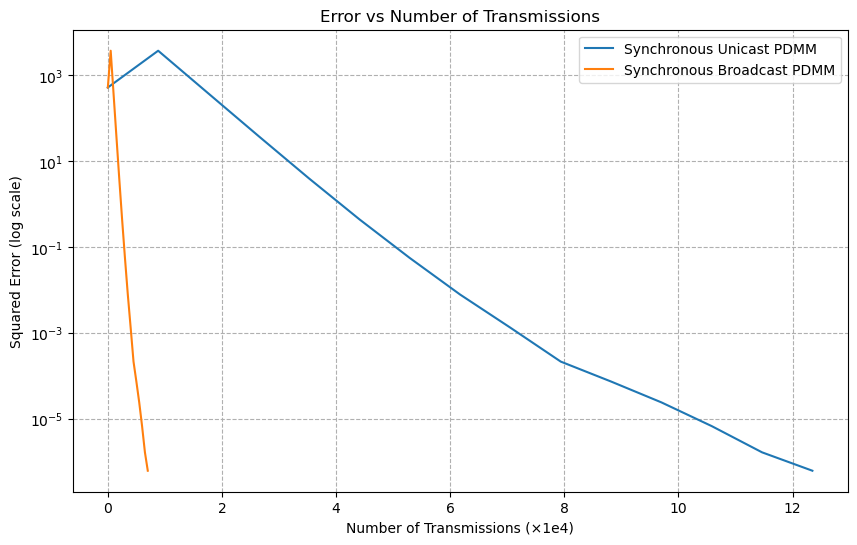

In [32]:
# generate image showing the squared error vs number of transmissions
# the image has 5 lines, only the results of syn unicast pdmm, syn broadcast pdmm
plt.figure(figsize=(10, 6))

# Synchronous Unicast PDMM
plt.semilogy(np.array(history_pdmm_syn_unicast['tx_curve']) / 1e4, history_pdmm_syn_unicast['errors'], label='Synchronous Unicast PDMM')
# Synchronous Broadcast PDMM
plt.semilogy(np.array(history_pdmm_syn_broadcast['tx_curve']) / 1e4, history_pdmm_syn_broadcast['errors'], label='Synchronous Broadcast PDMM')

plt.xlabel('Number of Transmissions (×1e4)')
plt.ylabel('Squared Error (log scale)')
plt.title('Error vs Number of Transmissions')
plt.grid(True, which="both", ls="--")
plt.legend()
plt.show()

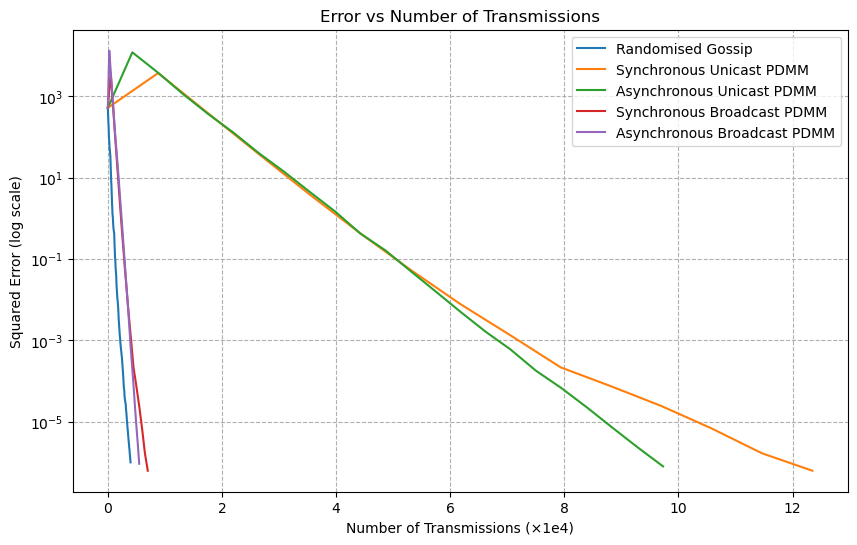

In [33]:
# generate image showing the squared error vs number of transmissions
# 横坐标改成x乘以10的4次方
plt.figure(figsize=(10, 6))
# Randomised Gossip
plt.semilogy(np.arange(0, len(history_rg['errors'])) * 10 * 2 / 1e4, history_rg['errors'], label='Randomised Gossip')
# Synchronous Unicast PDMM
plt.semilogy(np.array(history_pdmm_syn_unicast['tx_curve']) / 1e4, history_pdmm_syn_unicast['errors'], label='Synchronous Unicast PDMM')
# Asynchronous Unicast PDMM
plt.semilogy(np.array(history_pdmm_asyn_unicast['tx_curve']) / 1e4, history_pdmm_asyn_unicast['errors'], label='Asynchronous Unicast PDMM')
# Synchronous Broadcast PDMM
plt.semilogy(np.array(history_pdmm_syn_broadcast['tx_curve']) / 1e4, history_pdmm_syn_broadcast['errors'], label='Synchronous Broadcast PDMM')
# Asynchronous Broadcast PDMM
plt.semilogy(np.array(history_pdmm_asyn_broadcast['tx_curve']) / 1e4, history_pdmm_asyn_broadcast['errors'], label='Asynchronous Broadcast PDMM')

plt.xlabel('Number of Transmissions (×1e4)')
plt.ylabel('Squared Error (log scale)')
plt.title('Error vs Number of Transmissions')
plt.grid(True, which="both", ls="--")
plt.legend()
plt.show()

## Q3

In [180]:
# ------------------ Helper: Soft-thresholding for L1 ------------------
def soft_threshold(a, tau):
    """Soft–threshold operator S_τ(a) = sign(a)·max(|a|−τ, 0)."""
    return np.sign(a) * np.maximum(np.abs(a) - tau, 0.0)


def pdmm_median_consensus(
        v,               # Local measurements v_i  (1-D NumPy array)
        adj,             # Adjacency matrix (bool 2-D, adj[i,j]=True ⇔ edge)
        c=1.0,           # PDMM parameter  (typ. 0.5–2.0, ≈ 1/ρ in ADMM)
        max_iter=5000,
        tol=1e-6,
        log_freq=10,
        verbose=False):
    """
    Synchronous PDMM (θ = 1) for the *median* consensus problem:
        minimise  Σ_i |x - v_i|   subject to x_i = x_j  ∀(i,j)∈E.

    Returns
    -------
    x : np.ndarray
        Node states after convergence (should equal the global median).
    history : dict
        'errors'        – squared error w.r.t. true median every log_freq iters
        'tx_curve'      – cumulative scalar transmissions
        'transmissions' – final total number of scalars sent
    """
    n   = len(v)
    deg = np.sum(adj, axis=1)            # Node degree d_i
    med = np.median(v)                   # Ground-truth median (for logging)

    # ---------- directed edges & variables ----------
    dir_edges = [(i, j) for i in range(n) for j in range(n)
                 if i != j and adj[i, j]]
    z = {e: 0.0 for e in dir_edges}      # z_{i|j}
    x = v.copy()

    # ---------- logging ----------
    err_hist = [np.sum((x - med) ** 2)]
    tx_hist  = [0]
    per_iter_tx = len(dir_edges)         # One scalar y_{i|j} per directed edge

    # ---------- main loop ----------
    for k in range(1, max_iter + 1):
        # 1) primal update: x_i
        x_new = np.empty_like(x)
        for i in range(n):
            # p_i = −(1/d_i) Σ_j z_{i|j}
            p_i = - (1.0 / deg[i]) * sum(z[(i, j)]
                                          for j in range(n)
                                          if adj[i, j] and i != j)
            # prox_{|·−v_i| / (c d_i)}(p_i)
            tau = 1.0 / (c * deg[i])     # threshold
            x_new[i] = v[i] + soft_threshold(p_i - v[i], tau)

        # 2) y-update and 3) z-update (direction reversal)
        z_next = {}
        for (i, j) in dir_edges:
            y_ij          = z[(i, j)] + 2 * c * x_new[i]   # y_{i|j}^{(k)}
            z_next[(j, i)] = -y_ij                         # z_{j|i}^{(k+1)}

        # commit
        z = z_next
        x = x_new

        # ---- logging / convergence check ----
        if k % log_freq == 0:
            err = np.sum((x - med) ** 2)
            err_hist.append(err)
            tx_hist.append(per_iter_tx * k)
            if verbose:
                print(f"iter {k:5d} | err = {err:.3e}")
            if err < tol:
                break

    history = {
        'errors': err_hist,
        'tx_curve': tx_hist,
        'transmissions': tx_hist[-1]
    }
    return x, history

Errors: [449.4979101454766, 26493.33664380247, 23657.478418346658, 20983.242319329875, 18466.251904552344, 16119.495707062748, 13930.441053606166, 11898.178521696193, 10029.524512679165, 8314.231137541014, 6759.866048149412, 5367.051625392111, 4132.266551618806, 3060.2780495280163, 2151.1448739594543, 1401.0478118031533, 813.0878100379971, 437.9001844859269, 219.0884932266092, 104.25377762537849, 53.66767090340715, 32.706142856426496, 21.220756373899462, 13.338838984078137, 8.466238748385088, 4.992366432443347, 2.2945490835142968, 0.786396640443445, 0.24954132663372244, 0.1711315445538843, 0.11788720423278798, 0.10966782430751394, 0.13958014985684175, 0.13839175963629027, 0.14874125564134008, 0.13607399364229356, 0.1301077244702824, 0.1608716605920177, 0.16253477448862794, 0.16248639921817745, 0.11475016031294188, 0.09493879423100567, 0.10503064901976607, 0.09290503682618531, 0.0932971580692268, 0.08916750577132593, 0.10945881291075632, 0.09436655306092129, 0.08632940079907249, 0.09698

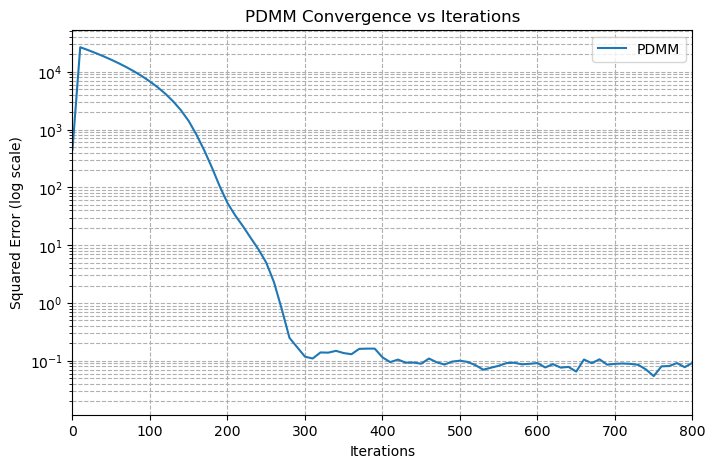

In [181]:
final_pdmm, history_pdmm = pdmm_median_consensus(init_values, adj_matrix)
print("Errors:", history_pdmm['errors'])
print("Length:", len(history_pdmm['errors']))
# ------------------ 可视化：误差 vs 迭代次数 ------------------
plt.figure(figsize=(8, 5))
plt.semilogy(np.arange(0, len(history_pdmm['errors'])) * 10, history_pdmm['errors'], label='PDMM')
plt.xlabel('Iterations')
plt.ylabel('Squared Error (log scale)')
plt.title('PDMM Convergence vs Iterations')
plt.grid(True, which='both', linestyle='--')
plt.xlim(0, 0.8*1e3)
plt.legend()
plt.show()


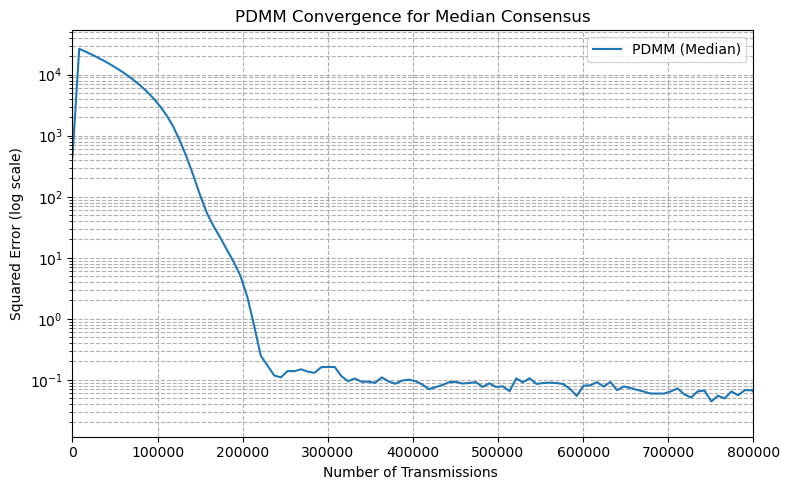

Total number of transmissions used by PDMM: 3950000


In [182]:
edge_count = np.sum(adj_matrix) // 2
x_trans = np.arange(len(history_pdmm['errors'])) * 10 * 2 * edge_count
plt.figure(figsize=(8,5))
plt.semilogy(x_trans, history_pdmm['errors'], label='PDMM (Median)')
plt.xlabel('Number of Transmissions ')
plt.ylabel('Squared Error (log scale)')
plt.title('PDMM Convergence for Median Consensus')
plt.grid(True, which='both', linestyle='--')
plt.xlim(0, 0.8 * 1e6)
plt.legend()
plt.tight_layout()
plt.show()

# ------------------ 输出总通信次数 ------------------
print("Total number of transmissions used by PDMM:", history_pdmm['transmissions'])